# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [7]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status, size = size_dataset, p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [6]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"], columns = "Frequency", normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,230
Treatment,168


col_0,Frequency
status,
Control,0.577889
Treatment,0.422111


<font size = "5">

Query with string conditions

In [23]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [9]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,23.645349,5.377907,190.052326,2915.267442,15.511047
std,7.895867,1.714124,105.478318,858.003700,2.678602
min,10.000000,3.000000,70.000000,1649.000000,8.000000
25%,17.500000,4.000000,104.750000,2190.000000,13.975000
50%,23.000000,4.000000,140.000000,2682.000000,15.500000
75%,30.000000,8.000000,270.500000,3582.750000,17.000000
max,44.300000,8.000000,455.000000,4997.000000,23.500000


,mpg,cylinders,displacement,weight,acceleration
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,23.415044,5.513274,195.995575,3012.402655,15.611504
std,7.770728,1.692415,103.499372,837.717317,2.821528
min,9.000000,3.000000,68.000000,1613.000000,8.500000
25%,17.125000,4.000000,102.000000,2257.250000,13.800000
50%,22.350000,5.000000,155.500000,2895.000000,15.500000
75%,28.000000,8.000000,262.000000,3616.250000,17.400000
max,46.600000,8.000000,454.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [3]:
def func(var):
    if(var < 6):
        return("Less than 6")
    else:
        return("Greater than or equal to 6")

print(func(-1))
print(func(3))
carfeatures["LessOrMore"] = carfeatures["cylinders"].apply(func)
display(carfeatures)

Less than 6
Less than 6


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,LessOrMore
0,18.0,8,307,130,3504,12.0,C-1689780,Greater than or equal to 6
1,15.0,8,350,165,3693,11.5,B-1689791,Greater than or equal to 6
2,18.0,8,318,150,3436,11.0,P-1689802,Greater than or equal to 6
3,16.0,8,304,150,3433,12.0,A-1689813,Greater than or equal to 6
4,17.0,8,302,140,3449,10.5,F-1689824,Greater than or equal to 6
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Less than 6
394,44.0,4,97,52,2130,24.6,V-1694114,Less than 6
395,32.0,4,135,84,2295,11.6,D-1694125,Less than 6
396,28.0,4,120,79,2625,18.6,F-1694136,Less than 6


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [4]:
med = carfeatures["cylinders"].mean()
print(med)
data_med = carfeatures.query("cylinders < @med")
print(data_med)

5.454773869346734
      mpg  cylinders  displacement horsepower  weight  acceleration  \
14   24.0          4           113         95    2372          15.0   
18   27.0          4            97         88    2130          14.5   
19   26.0          4            97         46    1835          20.5   
20   25.0          4           110         87    2672          17.5   
21   24.0          4           107         90    2430          14.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4           140         86    2790          15.6   
394  44.0          4            97         52    2130          24.6   
395  32.0          4           135         84    2295          11.6   
396  28.0          4           120         79    2625          18.6   
397  31.0          4           119         82    2720          19.4   

    vehicle_id   LessOrMore  
14   T-1689934  Less than 6  
18   D-1689978  Less than 6  
19   V-1689989  Less than 6  
20   P-16

<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [8]:
carfeaturessorted = carfeatures.sort_values(by = "displacement", ascending = False)
top5 = carfeaturessorted.iloc[0:5,:]
display(top5)
carfeaturessorted2 = carfeatures.sort_values(by = "weight", ascending = False)
top3 = carfeaturessorted2.iloc[0:5,:]
display(top3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,LessOrMore
8,14.0,8,455,225,4425,10.0,P-1689868,Greater than or equal to 6
95,12.0,8,455,225,4951,11.0,B-1690825,Greater than or equal to 6
13,14.0,8,455,225,3086,10.0,B-1689923,Greater than or equal to 6
6,14.0,8,454,220,4354,9.0,C-1689846,Greater than or equal to 6
7,14.0,8,440,215,4312,8.5,P-1689857,Greater than or equal to 6


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,LessOrMore
44,13.0,8,400,175,5140,12.0,P-1690264,Greater than or equal to 6
103,11.0,8,400,150,4997,14.0,C-1690913,Greater than or equal to 6
42,12.0,8,383,180,4955,11.5,D-1690242,Greater than or equal to 6
90,12.0,8,429,198,4952,11.5,M-1690770,Greater than or equal to 6
95,12.0,8,455,225,4951,11.0,B-1690825,Greater than or equal to 6


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [9]:
list_status1  = ["A","B"]
prop_status1  = [0.2,0.8]
size_dataset1 = len(carfeatures)
carfeatures["newcolumn"] = np.random.choice(list_status1, size = size_dataset1, p = prop_status1)
dataA = carfeatures.query('newcolumn == "A"')
dataB = carfeatures.query('newcolumn == "B"')
display(dataA)
display(dataB)


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,LessOrMore,newcolumn
1,15.0,8,350,165,3693,11.5,B-1689791,Greater than or equal to 6,A
5,15.0,8,429,198,4341,10.0,F-1689835,Greater than or equal to 6,A
15,22.0,6,198,95,2833,15.5,P-1689945,Greater than or equal to 6,A
19,26.0,4,97,46,1835,20.5,V-1689989,Less than 6,A
20,25.0,4,110,87,2672,17.5,P-1690000,Less than 6,A
...,...,...,...,...,...,...,...,...,...
379,36.0,4,98,70,2125,17.3,M-1693949,Less than 6,A
382,34.0,4,108,70,2245,16.9,T-1693982,Less than 6,A
384,32.0,4,91,67,1965,15.7,H-1694004,Less than 6,A
388,26.0,4,156,92,2585,14.5,C-1694048,Less than 6,A


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,LessOrMore,newcolumn
0,18.0,8,307,130,3504,12.0,C-1689780,Greater than or equal to 6,B
2,18.0,8,318,150,3436,11.0,P-1689802,Greater than or equal to 6,B
3,16.0,8,304,150,3433,12.0,A-1689813,Greater than or equal to 6,B
4,17.0,8,302,140,3449,10.5,F-1689824,Greater than or equal to 6,B
6,14.0,8,454,220,4354,9.0,C-1689846,Greater than or equal to 6,B
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Less than 6,B
394,44.0,4,97,52,2130,24.6,V-1694114,Less than 6,B
395,32.0,4,135,84,2295,11.6,D-1694125,Less than 6,B
396,28.0,4,120,79,2625,18.6,F-1694136,Less than 6,B


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [10]:
def fourfunc(y,x,b0,b1):
    c = y+x+b0+b1
    return c

fourfunc(1,2,3,4)

10

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

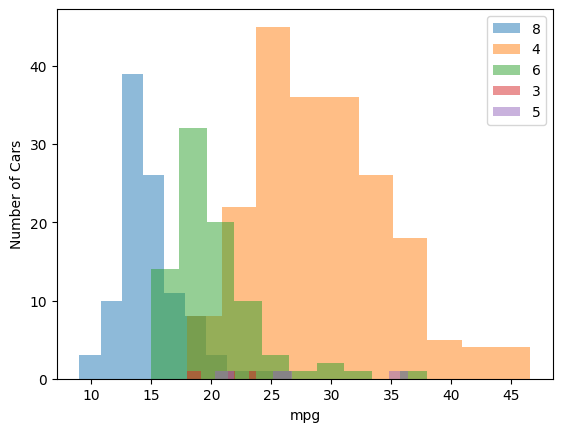

In [11]:
list_unique_cylinders = pd.unique(carfeatures["cylinders"])

for category_value in list_unique_cylinders:
    temporarydataframe = carfeatures.query("cylinders == @category_value")
    plt.hist(temporarydataframe["mpg"],alpha = 0.5)

plt.legend(labels = list_unique_cylinders)
plt.ylabel("Number of Cars")
plt.xlabel("mpg")

plt.show()


Text(0.5, 0, 'mpg')

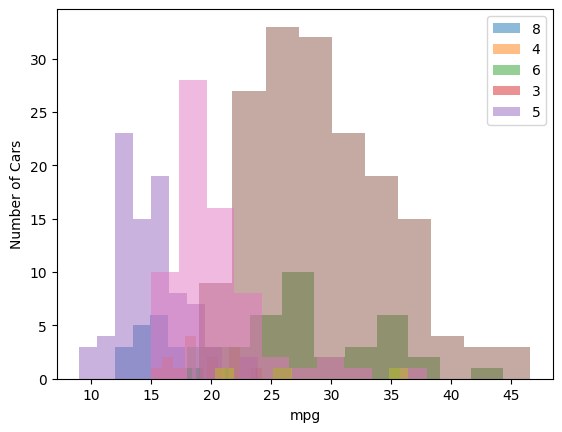

In [18]:
plt.tight_layout()
listset1 = pd.unique(dataA["cylinders"])

for varti in listset1:
    tempdatframe = dataA.query("cylinders == @varti")
    plt.hist(tempdatframe["mpg"],alpha = .5)

plt.legend(labels = listset1)
plt.ylabel("Number of Cars")
plt.xlabel("mpg")

listset2 = pd.unique(dataB["cylinders"])

for varti in listset2:
    tempdatframe = dataB.query("cylinders == @varti")
    plt.hist(tempdatframe["mpg"],alpha = .5)

plt.legend(labels = listset2)
plt.ylabel("Number of Cars")
plt.xlabel("mpg")